In [2]:
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [7]:
def train_neural_network(X, y) -> None:
    """
    This function trains the neural network.
    """

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    x_traincnn = np.expand_dims(X_train, axis=2)
    x_testcnn = np.expand_dims(X_test, axis=2)

    print(x_traincnn.shape, x_testcnn.shape)

    model = Sequential()
    model.add(Conv1D(64, 5, padding='same',
                        input_shape=(40, 1)))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(6))
    model.add(Activation('softmax'))

    print(model.summary)

    model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])

    cnn_history = model.fit(x_traincnn, y_train,
                               batch_size=16, epochs=25,
                               validation_data=(x_testcnn, y_test))

    # Loss plotting
    plt.plot(cnn_history.history['loss'])
    plt.plot(cnn_history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('loss.png')
    plt.close()

    # Accuracy plotting
    plt.plot(cnn_history.history['accuracy'])
    plt.plot(cnn_history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('acc')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('accuracy.png')

    predictions = model.predict_classes(x_testcnn)
    new_y_test = y_test.astype(int)
    matrix = confusion_matrix(new_y_test, predictions)

    print(classification_report(new_y_test, predictions))
    print(matrix)

    model_name = 'emotion_class.h5'

    # Save model and weights
    if not os.path.isdir(r'C:\Users\ASUS\Desktop\Projects\Audio Sentiment Analysis\model'):
        os.makedirs(r'C:\Users\ASUS\Desktop\Projects\Audio Sentiment Analysis\model')
    model_path = os.path.join(r'C:\Users\ASUS\Desktop\Projects\Audio Sentiment Analysis\model', model_name)
    model.save(model_path)
    print('Saved trained model at %s ' % model_path)

(1954, 40, 1) (963, 40, 1)
<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x0000020F08B35160>>
Train on 1954 samples, validate on 963 samples
Epoch 1/25
1954/1954 [==============================] - 0s 178us/step - loss: 3.4875 - accuracy: 0.5629 - val_loss: 1.6139 - val_accuracy: 0.6947
Epoch 2/25
1954/1954 [==============================] - 0s 140us/step - loss: 1.8495 - accuracy: 0.7021 - val_loss: 2.2940 - val_accuracy: 0.6521
Epoch 3/25
1954/1954 [==============================] - 0s 143us/step - loss: 1.1740 - accuracy: 0.7492 - val_loss: 1.7277 - val_accuracy: 0.6885
Epoch 4/25
1954/1954 [==============================] - 0s 140us/step - loss: 0.8266 - accuracy: 0.7932 - val_loss: 0.5713 - val_accuracy: 0.8110
Epoch 5/25
1954/1954 [==============================] - 0s 135us/step - loss: 0.6155 - accuracy: 0.8106 - val_loss: 0.8673 - val_accuracy: 0.7736
Epoch 6/25
1954/1954 [==============================] - 0s 138us/step - loss: 0.4841 - accuracy:

C:\Users\ASUS\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


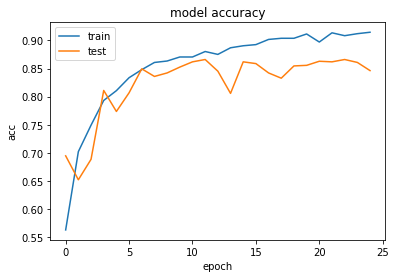

In [8]:
save_path=r'C:\Users\ASUS\Desktop\Projects\Audio Sentiment Analysis\joblib_features'
X = joblib.load(save_path + '/data.joblib')
y = joblib.load(save_path + '/labels.joblib')
NEURAL_NET = train_neural_network(X=X, y=y)

In [9]:
save_path=r'C:\Users\ASUS\Desktop\Projects\Audio Sentiment Analysis\joblib_features'
X = joblib.load(save_path + '/data.joblib')
y = joblib.load(save_path + '/labels.joblib')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)